#                                                Backorder Prediction

## Description:

Backorders are unavoidable, but by anticipating which things will be backordered, planning can be streamlined at several levels, preventing unexpected strain on production, logistics, and transportation. ERP systems generate a lot of data (mainly structured) and also contain a lot of historical data; if this data can be properly utilized, a predictive model to forecast backorders and plan accordingly can be constructed. Based on past data from inventories, supply chain, and sales, classify the products as going into backorder (Yes or No).

## Problem Statement:
Classify the products whether they would go into Backorder based on the historical data from inventory, supply chain and sales

## Source/Useful Links:

#### Some articles and reference blogs about the problem statement
1. https://medium.com/analytics-vidhya/backorder-prediction-d4f1c5362f18#:~:text=A%20Backorder%20is%20an%20order,replenishment%20of%20inventory%20is%20underway
2. https://www.researchgate.net/publication/319553365_Predicting_Material_Backorders_in_Inventory_Management_using_Machine_Learning
3. https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00345-2
4. https://www.researchgate.net/publication/327752791_Demand_Forecasting_Using_Artificial_Neural_NetworksA_Case_Study_of_American_Retail_Corporation
5. https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/
6. https://heartbeat.fritz.ai/resampling-to-properly-handle-imbalanced-datasets-in-machine-learning-64d82c16ceaa


#### Data_Source:
- https://github.com/rodrigosantis1/backorder_prediction/blob/master/dataset.rar
- We have two data files: one conatins containing training data and other containing test data

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [23]:
#! pip install --upgrade seaborn

In [2]:
df = pd.read_csv('C:/Users/hp/Desktop/Data Scientist/Internship/10112021 Backorder Prediction/1. Original Data/Kaggle_Training_Dataset_v2.csv', low_memory=False)
df_original_train = df.copy()

## Exploratory Data Analysis and Visualization

* 1. **Dataset Analysis:** 
     * 1.1 Missing Values
     * 1.2 Features in the dataset
     * 1.3 Class Imbalance Check
     
* 2. **Numerical Feature Statistics and Observations:**
     * 2.1 Different Statistics of the Numerical Features using Pandas Describe Function 
     * 2.2 Histogram of Continous Features in the Dataset
     * 2.3 KDE plot for clear visualization of the distribution
     * 2.3 Boxplot between Continous Features and target value "went_on_backorder"
     * 2.4 Pair Plots between Selected Features for Entire Data and Data between 5th and 90th Quantiles
     
* 3. **Categorical Feature Statistics and Observations:**
     * Bar plots between categorical features and target value "went_on_backorder"
     
* 4. **Observations from Exploratory Data Analysis and Visualization** which will be taken care in the next step i.e. Feature Engineering:


### 1. Dataset Analysis: Missing Values, Features, and Class Imbalance Check


In [3]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [4]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.1 Missing Values Observed in the Dataset:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
sku                  1687861 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null object
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null object
oe_constraint        1687860 non-null object
ppap_risk        

In [6]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

lead_time 0.0598  % missing values


* There are in total 1687861 entries and 23 Features in the dataset
* Only the column lead_time has a few null values.
* The last row of the dataset consists of NaN values for all features


### 1.2 Features in the Dataset:

#### Numerical Features:

In [7]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
numerical_features

Number of numerical variables:  15


['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty']

In [8]:
# visualise the numerical variables
df[numerical_features].head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,-99.00,-99.00,0.0


In [9]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in ['sku']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [10]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['sku']]
print("Continuous feature Count {}".format(len(continuous_feature)))


Continuous feature Count 15


#### Categorical Features

In [11]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical_features: ', len(categorical_features))
categorical_features

Number of categorical_features:  8


['sku',
 'potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [12]:
df[categorical_features].head()

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,No,No,No,No,Yes,No,No
1,1043384,No,No,No,No,Yes,No,No
2,1043696,No,Yes,No,No,Yes,No,No
3,1043852,No,No,No,No,Yes,No,No
4,1044048,No,Yes,No,No,Yes,No,No


In [13]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is sku and number of categories are 1687861
The feature is potential_issue and number of categories are 3
The feature is deck_risk and number of categories are 3
The feature is oe_constraint and number of categories are 3
The feature is ppap_risk and number of categories are 3
The feature is stop_auto_buy and number of categories are 3
The feature is rev_stop and number of categories are 3
The feature is went_on_backorder and number of categories are 3



  It seems the first column sku consists of product-ids , if all of them are unique then this column can be dropped. As expected the       number of unique values in sku column is equal to the number of rows. So this column can be dropped or used as index.
 



#### Observations Obtained about Features in the Dataset:
* In the Train dataset we are provided with 23 columns(Features) of data. Dataset has 15 columns of data type float and 8 coumns are       string ( including target variable)
     * Numerical Feature: 15 columns 
     * All the features are continuous numerical variables.
             1. national_inv : The present inventory level of the product
             2. lead_time : Transit time of the product
             3. in_transit_qty : The amount of product in transit
             4. forecast_3_month: Forecast of the sales of the product for coming 3 months 
             5. forecast_6_month: Forecast of the sales of the product for coming 6 months 
             6. forecast_9_month : Forecast of the sales of the product for coming 9 months 
             7. sales_1_month: Actual sales of the product in last 1 month
             8. sales_3_month: Actual sales of the product in last 3 months 
             9. sales_6_month: Actual sales of the product in last 6 months 
            10. sales_9_month : Actual sales of the product in last 9 months 
            11. min_bank : Minimum amount of stock recommended
            12. pieces_past_due: Amount of parts of the product overdue if any
            13. perf_6_month_avg: Product performance over past 6 months 
            14. perf_12_month_avg: Product performance over past 12 months 
            15. Local_bo_qty : Amount of stock overdue
             
     * Categorical Features: 8 columns
            1. sku(Stock Keeping unit) : The product id — Unique for each row so can be ignored
            2. Potential_issue : Any problem identified in the product/part.Different Flags (Yes/No/nan) set for the product
            3. Deck_risk: Different Flags (Yes or No or nan) set for the product
            4. oe_constraint: Different Flags (Yes or No or nan) set for the product
            5. ppap_risk: Different Flags (Yes or No or nan) set for the product
            6. stop_auto_buy: Different Flags (Yes or No or nan) set for the product
            7. rev_stop : Different Flags (Yes or No or nan) set for the product
            8. went_on_backorder: Label/Target Variable. The target variable to predict consists of two values.
               “Yes” - If the Product predicted to go to Backorder
               “No” - If the Product predicted to be not going to Backorder
               "nan" - missing values
               
So it is a Binary Classification problem.
       
The last row of the dataset consists of NaN values for all features, which will be dropped in the feature engineering section.

### 1.3 Class Imbalance Check

*   The target variable went_on_backorder is a categorical feature with two values "Yes" and "No".
*   99.33% belong to the class "Yes" and remaining 0.669% belong to the class "No" .
*   Hence the dataset is highly imbalanced with majority and minority class ratio of approximately 148:1

The class imbalance will be handled in the feature engineering section.



In [14]:
df['went_on_backorder'].value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

### 2. Numerical Feature Statistics and Observations

In this section, we will try to detect outliers, skewness, and other insights from these numerical features though statistical analysis.
 * 2.1 Different Statistics of the Numerical Features using Pandas Describe Function 
 * 2.2 Histogram of Continous Features in the dataset
 * 2.3 Outliers in Numerical Features
 
    * Numerical Feature: 15 columns
             1. national_inv : The present inventory level of the product
             2. lead_time : Transit time of the product
             3. in_transit_qty : The amount of product in transit
             4. forecast_3_month: Forecast of the sales of the product for coming 3 months 
             5. forecast_6_month: Forecast of the sales of the product for coming 6 months 
             6. forecast_9_month : Forecast of the sales of the product for coming 9 months 
             7. sales_1_month: Actual sales of the product in last 1 month
             8. sales_3_month: Actual sales of the product in last 3 months 
             9. sales_6_month: Actual sales of the product in last 6 months 
            10. sales_9_month : Actual sales of the product in last 9 months 
            11. min_bank : Minimum amount of stock recommended
            12. pieces_past_due: Amount of parts of the product overdue if any
            13. perf_6_month_avg: Product performance over past 6 months 
            14. perf_12_month_avg: Product performance over past 12 months 
            15. Local_bo_qty : Amount of stock overdue
            
            
    * Label/Target Variable: went_on_backorder
             The target variable to predict consists of two values.
             “Yes” - If the Product predicted to go to Backorder
             “No” - If the Product predicted to be not going to Backorder
             "nan" - missing values      
             


### 2.1 Different Statistics of the Numerical Features using Pandas Describe Function 

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


#### Observations from Statistics of Numerical Features of Dataset
*   The scale of all the features is not same and should be scaled for better performance of ML models in the feature engineering section.
*   For  all numerical columns the mean value(except for lead_time) is between 50th and 75th percentile or mostly it is above 75th percentile (except for performance columns) which depict that data is extremely skewed right side.
*   The lead_time feature is left skewed.
*   The difference between 75th percentile and max values is very high which depcits that data contains many outliers.
*   The columns perf_6_month_avg and perf_12_month_avg has max. value as 1 and min. value as -99. It seems the missing values are replaced with -99 ( as explained in a few blogs on this dataset)


### 2.2 Histogram of Continous Features in the Dataset

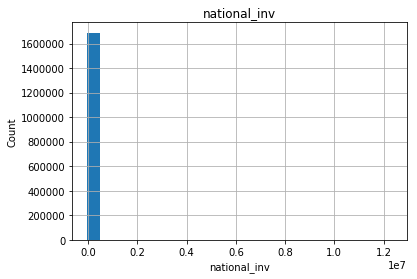

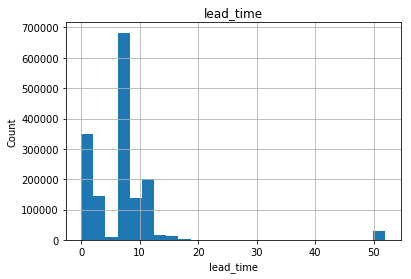

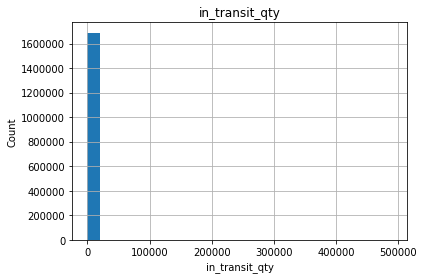

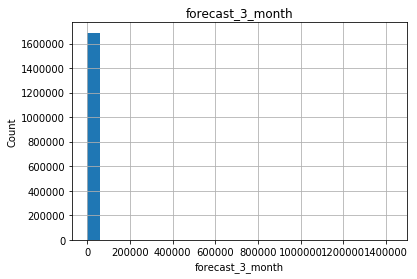

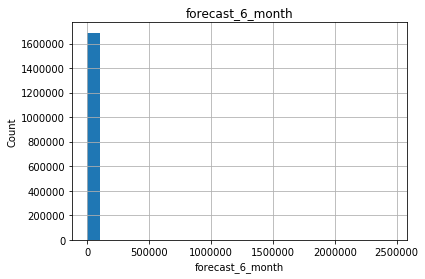

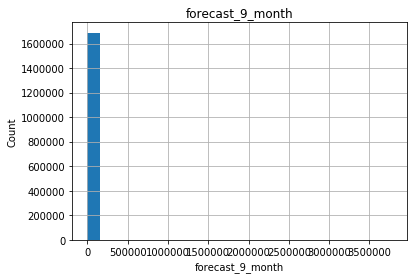

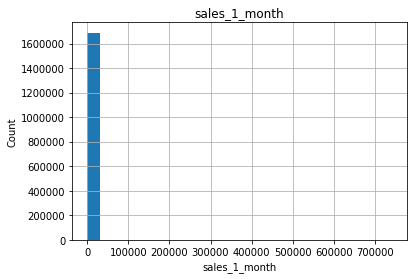

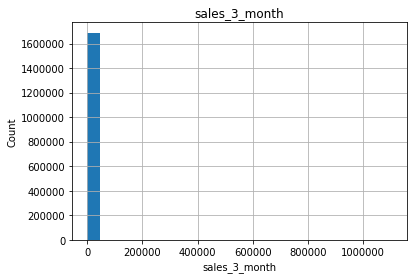

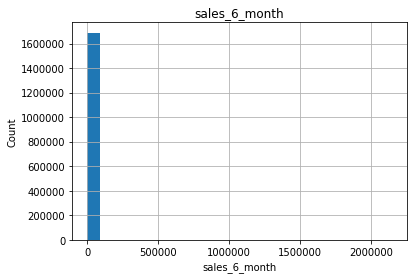

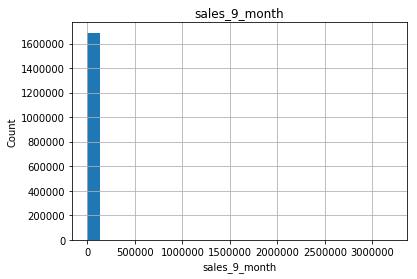

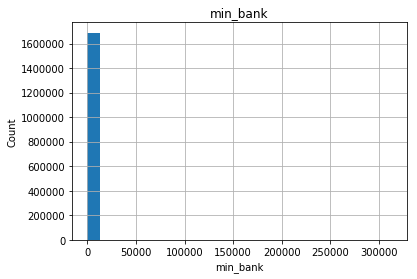

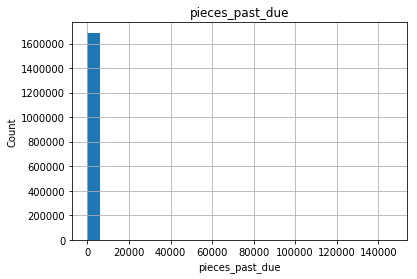

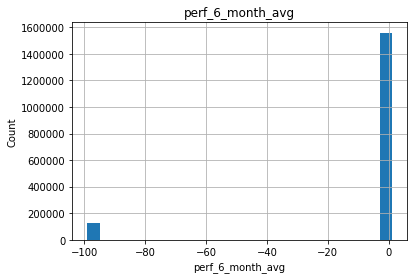

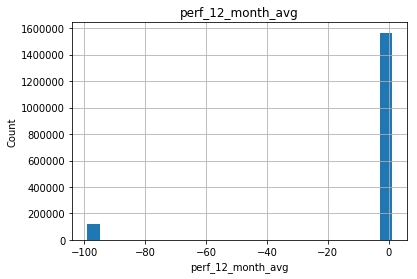

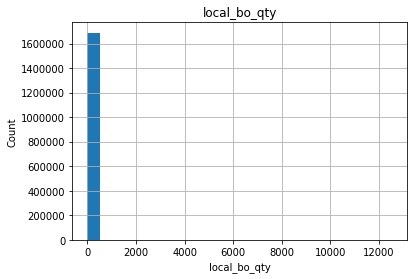

In [16]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    

    


### 2.3 KDE plot for clear visualization of the distribution: 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


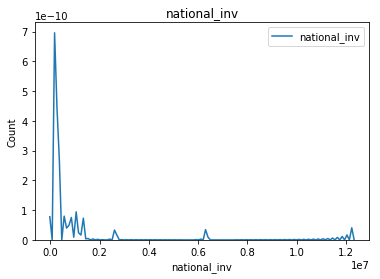

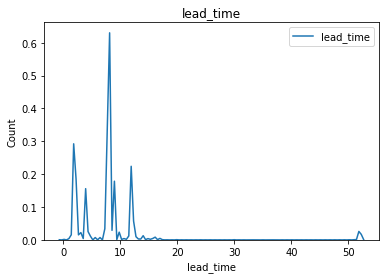

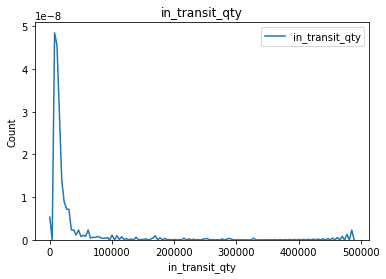

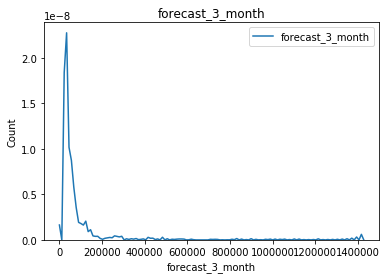

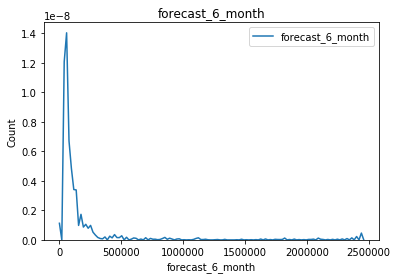

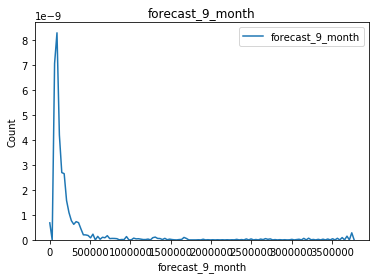

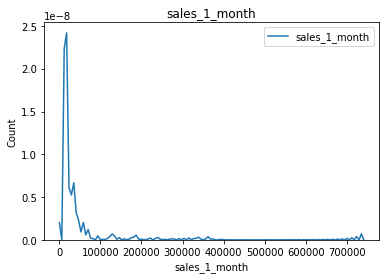

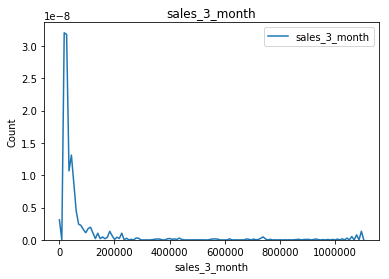

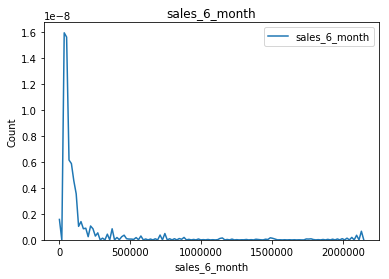

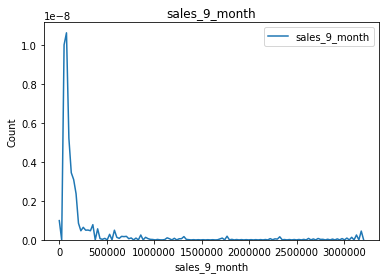

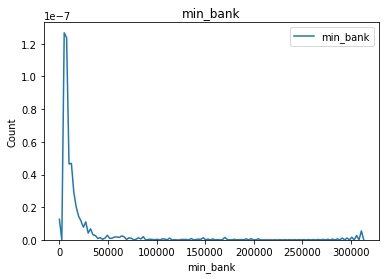

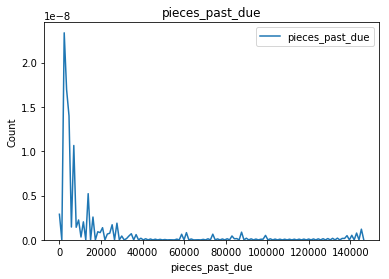

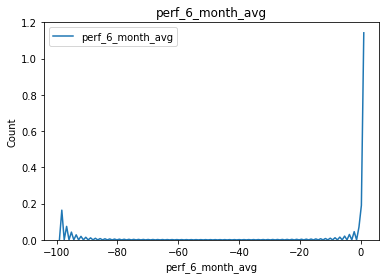

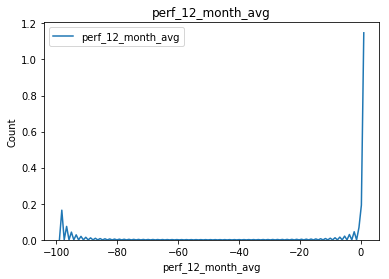

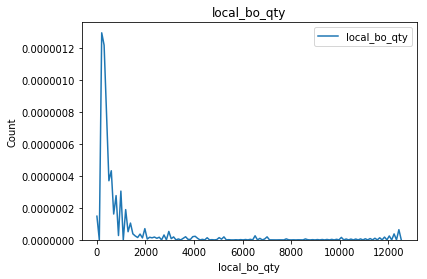

In [17]:

for feature in continuous_feature:
    data=df.copy()
    sns.kdeplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Observations from the distribution of Continous Features:

*   Most of the features are right skewed. There is need to transform these right skewed distributions to gaussian distribution. this       step will be performed in the features engineering section.  
*   perf_6_month_avg and perf_12_month_avg atr left skewed and have -99 as null values.
*   Most of the feature are having outliers. In the next step we will plot boxplots between continuos features and target value so that     we can analyse the outliers in more details.

### 2.3 Boxplot between Continous Features and "went_on_backorder"

#### 2.3.1 Boxplot between "national_inv" and "went_on_backorder"

"national_inv" represent inventory level of the product. 

In [15]:
df[['national_inv']].describe()

,national_inv
count,1.687860e+06
mean,4.961118e+02
std,2.961523e+04
min,-2.725600e+04
25%,4.000000e+00
50%,1.500000e+01
75%,8.000000e+01
max,1.233440e+07


Text(0.5,1,'Box plot of national_inv vs went_on_backorder')

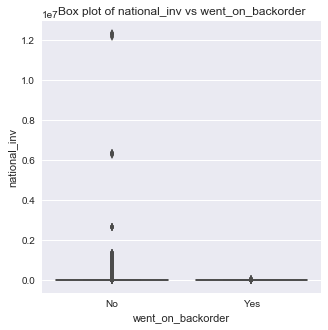

In [17]:
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x='went_on_backorder',y='national_inv', data=df).set_title('Box plot of national_inv vs went_on_backorder')

Text(0.5,1,'Box plot of national_inv from 0.1th to 90th percentile')

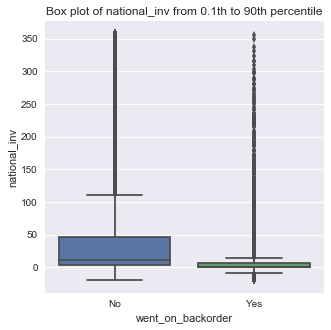

In [18]:
sns.boxplot(x='went_on_backorder',y='national_inv', data=df[(df.national_inv < df.national_inv.quantile(0.90))  & (df.national_inv > df.national_inv.quantile(0.001)) ]).set_title('Box plot of national_inv from 0.1th to 90th percentile')

Observations from the boxplot of "national_inv" and "went_on_backorder":

*   The spread is very high for inventory stock feature and IQR range is very small
*   Fortunately the majority class has outliers and there aren't any outliers in minority class
*   The IQR ranges for both the classes overlap so using this feature individualy won't be very useful for class separation
*   When plotted boxplot considering only the values between 0.1th and 90th percentile values of national_inv it can be seen that majority of the outliers on positive side are removed and max. value dropped from 10^7 to range of 350 
*   Also IQRs of both classes are not overlapping as they were before

#### 2.3.2 Boxplot between "lead_time" and "went_on_backorder"

lead_time represents transit time of the product.

In [19]:
df[['lead_time']].describe()

,lead_time
count,1.586967e+06
mean,7.872267e+00
std,7.056024e+00
min,0.000000e+00
25%,4.000000e+00
50%,8.000000e+00
75%,9.000000e+00
max,5.200000e+01


Text(0.5,1,'Box plot of lead_time vs went_on_backorder')

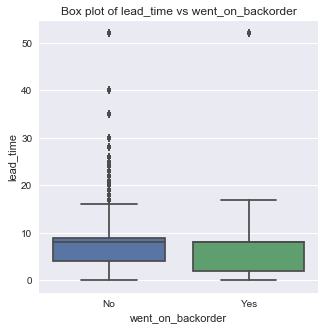

In [20]:
 sns.boxplot(x='went_on_backorder',y='lead_time', data=df).set_title('Box plot of lead_time vs went_on_backorder')

Observations from the boxplot of "lead_time" and "went_on_backorder":
*   There are a few outliers in the lead_time feature.
*   IQR of both the classes overlap to some extent , so this feature can be useful in separation of both classes at least in those cases where lead_time is less than 25th percentile value of negative class
*   Median is nearer to 75th percentile value

#### 2.3.3 Boxplot between "in_transit_qty" and "went_on_backorder"
in_transit_qty represents the amount of product in transit.

In [21]:
df[['in_transit_qty']].describe()

,in_transit_qty
count,1.687860e+06
mean,4.405202e+01
std,1.342742e+03
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,4.894080e+05


Text(0.5,1,'Box plot of in_transit_qty vs went_on_backorder')

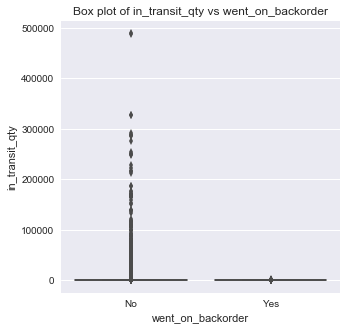

In [22]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty', data=df).set_title('Box plot of in_transit_qty vs went_on_backorder')

Text(0.5,1,'Box plot of in_transit_qty from 0 to 90th percentile')

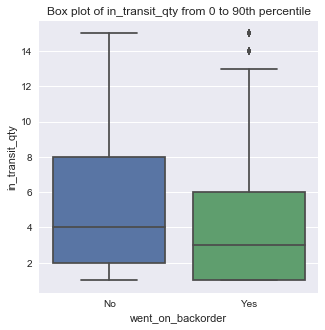

In [23]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty', data=df[(df.in_transit_qty < df.in_transit_qty.quantile(0.90))  & (df.in_transit_qty > df.in_transit_qty.quantile(0))]).set_title('Box plot of in_transit_qty from 0 to 90th percentile')

Observations from the boxplot of "in_transit_qty" and "went_on_backorder":


*   Similar to inventory stock feature the IQR is very small and there are many outliers(noise) in the orders that didn't go on backorder
*   The IQR of both the classes for this feature are overlapping .
*   After removal of values which are greater than 90th quantile value and which are less than 0th quantile it can be seen that in_transit_qty values dropped from 5*10^5 to 16
*   The IQR of both the classes for this feature are overlapping only to some extent now after removal of outliers and for many items whose transit quantity is less than 2 went to backorder and whose quantity is greater than 6 didn't go to backorder


#### 2.3.4 Boxplot between "forecast_3_month" and "went_on_backorder"
forecast_3_month represents forecast of the sales of the product for coming 3 months 
  

In [24]:
df[['forecast_3_month']].describe()

,forecast_3_month
count,1.687860e+06
mean,1.781193e+02
std,5.026553e+03
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,4.000000e+00
max,1.427612e+06


Text(0.5,1,'Box plot of forecast_3_month vs went_on_backorder')

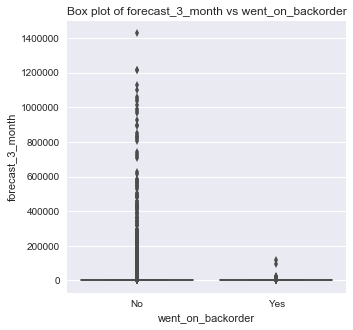

In [25]:
sns.boxplot(x='went_on_backorder',y='forecast_3_month', data=df).set_title('Box plot of forecast_3_month vs went_on_backorder')

Text(0.5,1,'Box plot of forecast_3_month from 0 to 90th percentile')

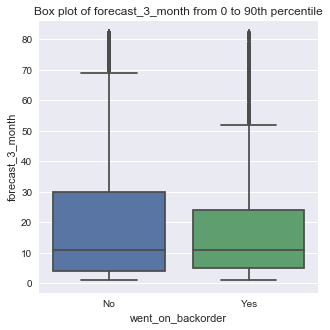

In [26]:
sns.boxplot(x='went_on_backorder',y='forecast_3_month', data=df[(df.forecast_3_month < df.forecast_3_month.quantile(0.90))  & (df.forecast_3_month > df.forecast_3_month.quantile(0))]).set_title('Box plot of forecast_3_month from 0 to 90th percentile')

#### 2.3.5 Boxplot between "forecast_6_month" and "went_on_backorder"
forecast_6_month represents forecast of the sales of the product for coming 6 months 
    

In [27]:
df[['forecast_6_month']].describe()

,forecast_6_month
count,1.687860e+06
mean,3.449867e+02
std,9.795152e+03
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.200000e+01
max,2.461360e+06


Text(0.5,1,'Box plot of forecast_6_month vs went_on_backorder')

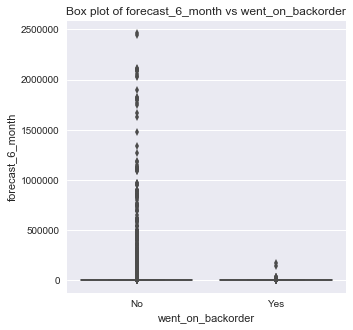

In [28]:
sns.boxplot(x='went_on_backorder',y='forecast_6_month', data=df).set_title('Box plot of forecast_6_month vs went_on_backorder')

Text(0.5,1,'Box plot of forecast_6_month from 0 to 90th percentile')

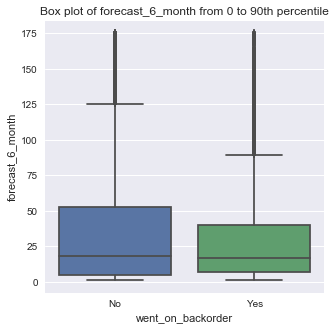

In [29]:
sns.boxplot(x='went_on_backorder',y='forecast_6_month', data=df[(df.forecast_6_month < df.forecast_6_month.quantile(0.90))  & (df.forecast_6_month > df.forecast_6_month.quantile(0))]).set_title('Box plot of forecast_6_month from 0 to 90th percentile')

#### 2.3.6 Boxplot between "forecast_9_month" and "went_on_backorder" 
forecast_9_month represents forecast of the sales of the product for coming 9 months 

In [30]:
df[['forecast_9_month']].describe()

,forecast_9_month
count,1.687860e+06
mean,5.063644e+02
std,1.437892e+04
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,2.000000e+01
max,3.777304e+06


Text(0.5,1,'Box plot of forecast_9_month vs went_on_backorder')

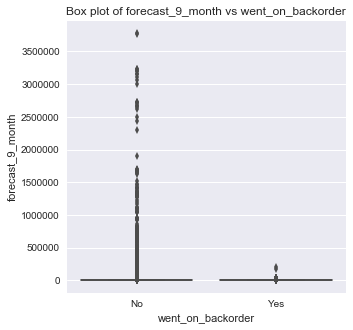

In [31]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month', data=df).set_title('Box plot of forecast_9_month vs went_on_backorder')

Text(0.5,1,'Box plot of forecast_9_month from 0 to 90th percentile')

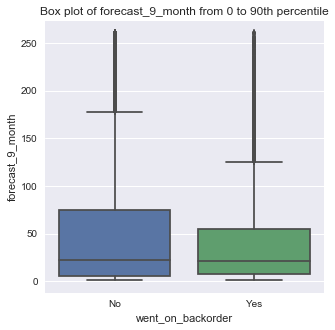

In [32]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month', data=df[(df.forecast_9_month < df.forecast_9_month.quantile(0.90))  & (df.forecast_9_month > df.forecast_9_month.quantile(0))]).set_title('Box plot of forecast_9_month from 0 to 90th percentile')

Text(0.5,1,'Box plot of forecast_9_month from 0 to 80th percentile')

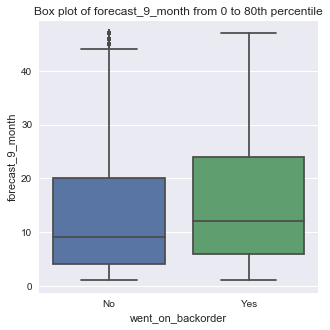

In [33]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month', data=df[(df.forecast_9_month < df.forecast_9_month.quantile(0.80))  & (df.forecast_9_month > df.forecast_9_month.quantile(0))]).set_title('Box plot of forecast_9_month from 0 to 80th percentile')

Observations from the boxplot of all the forecast features and "went_on_backorder":


*   The distribution of all the forecast features is similar.
*   Outliers do exist in these 3 features and their amount increase with forecast period
*   Even after the removal of the values which are above 90th quantile value and less than 0th quantile IQRs overlap
*   As values existed after whiskers in the plot of 0-90th percentile values boxplot if we consider only 0-80th perentile then it can be noted that if forecast is higher then there is higher chance of going to backorder



#### 2.3.7 Boxplot between "sales_1_month" and "went_on_backorder"
 sales_1_month represents actual sales of the product in last 1 month

In [34]:
df[['sales_1_month']].describe()

,sales_1_month
count,1.687860e+06
mean,5.592607e+01
std,1.928196e+03
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,4.000000e+00
max,7.417740e+05


Text(0.5,1,'Box plot of sales_1_month vs went_on_backorder')

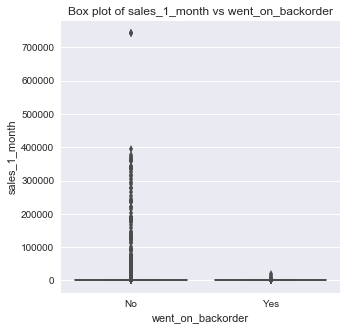

In [35]:
sns.boxplot(x='went_on_backorder',y='sales_1_month', data=df).set_title('Box plot of sales_1_month vs went_on_backorder')

Text(0.5,1,'Box plot of sales_1_month from 0 to 90th percentile')

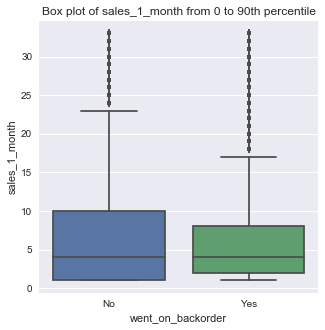

In [36]:
sns.boxplot(x='went_on_backorder',y='sales_1_month', data=df[(df.sales_1_month < df.sales_1_month.quantile(0.9))  & (df.sales_1_month > df.sales_1_month.quantile(0))]).set_title('Box plot of sales_1_month from 0 to 90th percentile')

#### 2.3.8 Boxplot between "sales_3_month" and "went_on_backorder"
sales_3_month represents actual sales of the product in last 3 months 
   

In [37]:
df[['sales_3_month']].describe()

,sales_3_month
count,1.687860e+06
mean,1.750259e+02
std,5.192378e+03
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.500000e+01
max,1.105478e+06


Text(0.5,1,'Box plot of sales_3_month vs went_on_backorder')

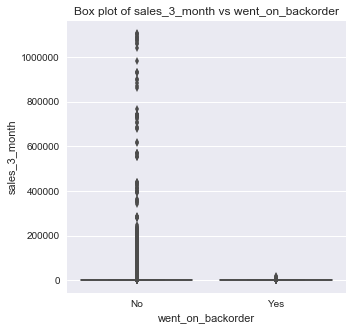

In [38]:
sns.boxplot(x='went_on_backorder',y='sales_3_month', data=df).set_title('Box plot of sales_3_month vs went_on_backorder')

Text(0.5,1,'Box plot of sales_3_month from 0 to 90th percentile')

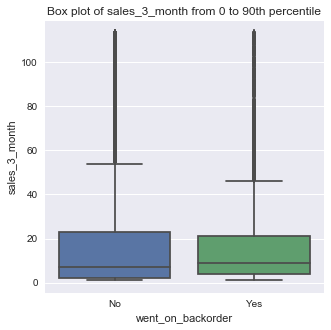

In [39]:
sns.boxplot(x='went_on_backorder',y='sales_3_month', data=df[(df.sales_3_month < df.sales_3_month.quantile(0.9))  & (df.sales_3_month > df.sales_3_month.quantile(0))]).set_title('Box plot of sales_3_month from 0 to 90th percentile')

Text(0.5,1,'Box plot of sales_3_month from 0 to 80th percentile')

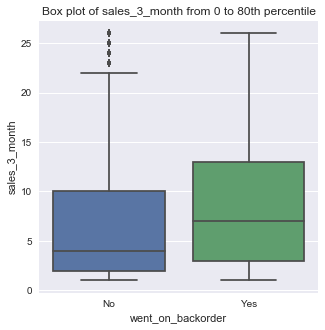

In [40]:
sns.boxplot(x='went_on_backorder',y='sales_3_month', data=df[(df.sales_3_month < df.sales_3_month.quantile(0.8))  & (df.sales_3_month > df.sales_3_month.quantile(0))]).set_title('Box plot of sales_3_month from 0 to 80th percentile')

Observations from the boxplot of "sales_3_month" and "went_on_backorder":
*   Even after removal of values greater than 90th quantile value the IQRs overlap fully with many values after whisker representing the max value.
*   So similar to forecast feature if we consider only values till 80th quantile it implies that higher the sales higher are the chances of going to backorder(while making this assumption class imbalace can't be ignored)


#### 2.3.9 Boxplot between "sales_6_month" and "went_on_backorder"
sales_6_month represents actual sales of the product in last 6 months 

In [41]:
df[['sales_6_month']].describe()

,sales_6_month
count,1.687860e+06
mean,3.417288e+02
std,9.613167e+03
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,3.100000e+01
max,2.146625e+06


Text(0.5,1,'Box plot of forecast_6_month vs went_on_backorder')

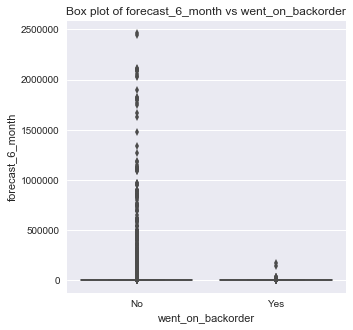

In [42]:
sns.boxplot(x='went_on_backorder',y='forecast_6_month', data=df).set_title('Box plot of forecast_6_month vs went_on_backorder')

Text(0.5,1,'Box plot of sales_6_month from 0 to 90th percentile')

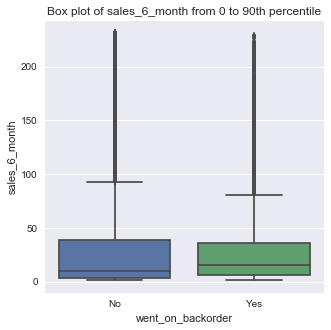

In [43]:
sns.boxplot(x='went_on_backorder',y='sales_6_month', data=df[(df.sales_6_month < df.sales_6_month.quantile(0.9))  & (df.sales_6_month > df.sales_6_month.quantile(0))]).set_title('Box plot of sales_6_month from 0 to 90th percentile')

#### 2.3.10 Boxplot between "sales_9_month" and "went_on_backorder"
sales_9_month represents actual sales of the product in last 9 months 
   

In [44]:
df[['sales_9_month']].describe()

,sales_9_month
count,1.687860e+06
mean,5.252697e+02
std,1.483861e+04
min,0.000000e+00
25%,0.000000e+00
50%,4.000000e+00
75%,4.700000e+01
max,3.205172e+06


Text(0.5,1,'Box plot of forecast_9_month vs went_on_backorder')

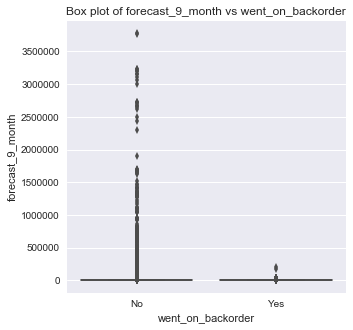

In [45]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month', data=df).set_title('Box plot of forecast_9_month vs went_on_backorder')

Text(0.5,1,'Box plot of sales_9_month from 0 to 90th percentile')

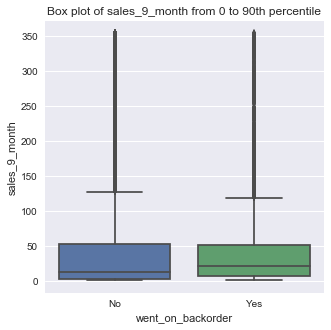

In [46]:
sns.boxplot(x='went_on_backorder',y='sales_9_month', data=df[(df.sales_9_month < df.sales_9_month.quantile(0.9))  & (df.sales_9_month > df.sales_9_month.quantile(0))]).set_title('Box plot of sales_9_month from 0 to 90th percentile')

Text(0.5,1,'Box plot of sales_9_month from 0 to 80th percentile')

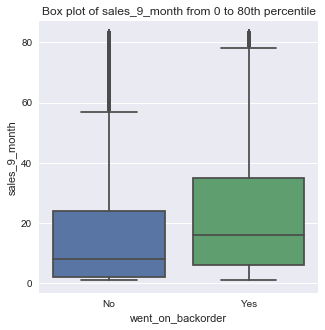

In [47]:
sns.boxplot(x='went_on_backorder',y='sales_9_month', data=df[(df.sales_9_month < df.sales_9_month.quantile(0.8))  & (df.sales_9_month > df.sales_9_month.quantile(0))]).set_title('Box plot of sales_9_month from 0 to 80th percentile')

Observations from the boxplot of all the sale features and "went_on_backorder":
*   Box plot of sales features is similar to forecast features
*   The values of these columns are right skewed
*   Even after removal of values greater than 90th quantile value the IQRs overlap fully with many values after whisker representing the max value.
*   So similar to forecast feature if we consider only values till 80th quantile it implies that higher the sales higher are the chances of going to backorder(while making this assumption class imbalace can't be ignored)


#### 2.3.11 Boxplot between "min_bank" and "went_on_backorder"
min_bank represents minimum amount of stock recommended
  

In [48]:
df[['min_bank']].describe()

,min_bank
count,1.687860e+06
mean,5.277230e+01
std,1.254983e+03
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,3.000000e+00
max,3.133190e+05


In [49]:
df.min_bank.quantile(0.51)

0.0

In [50]:
df.min_bank.quantile(0.99)

679.0

Text(0.5,1,'Box plot of min_bank')

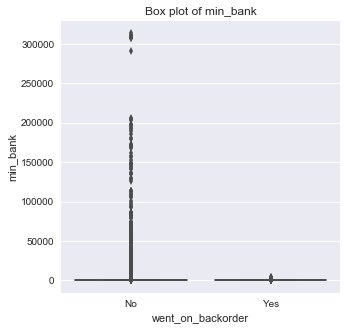

In [51]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=df).set_title('Box plot of min_bank')

Text(0.5,1,'Box plot of min_bank from 0 to 90th percentile')

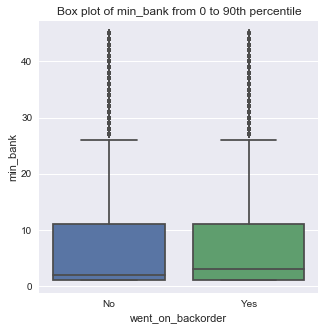

In [52]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=df[(df.min_bank < df.min_bank.quantile(0.9))  & (df.min_bank > df.min_bank.quantile(0))]).set_title('Box plot of min_bank from 0 to 90th percentile')

Text(0.5,1,'Box plot of min_bank from 0 to 80th percentile')

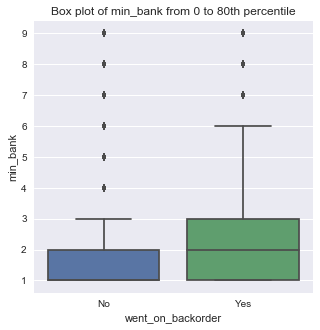

In [53]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=df[(df.min_bank < df.min_bank.quantile(0.8))  & (df.min_bank > df.min_bank.quantile(0))]).set_title('Box plot of min_bank from 0 to 80th percentile')

Observations from the boxplot of "min_bank" and "went_on_backorder":


*   min_bank feature also has right skewedness that is data is present wit high spread after 75th percentile value.
*   The positive class ( went_on_backorder = "Yes" ) doesn't show any skewness after 75th percentile because as this feature represents minimum amount of stock recommended if it is high there is a high chance that this product didn't go on backorder 
*   If we consider only values lesser than 80th quanitle value then if min_bank > 2 then there is very high chance of item going into backorder



#### 2.3.12 Boxplot between "pieces_past_due" and "went_on_backorder"
pieces_past_due represents amount of parts of the product overdue if any
    

In [54]:
df[['pieces_past_due']].describe()

,pieces_past_due
count,1.687860e+06
mean,2.043724e+00
std,2.360165e+02
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.464960e+05


In [55]:
df.pieces_past_due.quantile(0.98)

0.0

In [56]:
df.pieces_past_due.quantile(0.99)

4.0

Text(0.5,1,'Box plot of pieces_past_due vs went_on_backorder')

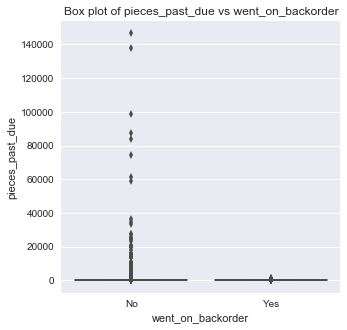

In [57]:
sns.boxplot(x='went_on_backorder',y='pieces_past_due', data=df).set_title('Box plot of pieces_past_due vs went_on_backorder')

Observations from the boxplot of "pieces_past_due" and "went_on_backorder":


*   IQR ranges of both the classes are over lapping for pieces_past_due feature.
*   The spread is very high for negative class after 75th percentile
*   Only 1% of values has non-zero spieces_past_due 



#### 2.3.13 Boxplot between "perf_6_month_avg" and "went_on_backorder"
 perf_6_month_avg represents Product performance over past 6 months.


In [58]:
df[['perf_6_month_avg']].describe()

,perf_6_month_avg
count,1.687860e+06
mean,-6.872059e+00
std,2.655636e+01
min,-9.900000e+01
25%,6.300000e-01
50%,8.200000e-01
75%,9.700000e-01
max,1.000000e+00


Text(0.5,1,'Box plot of perf_6_month_avg from 0 to 90th percentile')

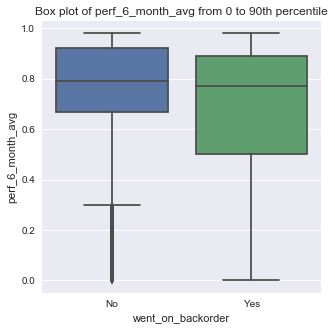

In [59]:
sns.boxplot(x='went_on_backorder',y='perf_6_month_avg', data=df[(df.perf_6_month_avg < df.perf_6_month_avg.quantile(0.9))  & (df.perf_6_month_avg > df.perf_6_month_avg.quantile(0))]).set_title('Box plot of perf_6_month_avg from 0 to 90th percentile')

#### 2.3.14 Boxplot between "perf_12_month_avg" and "went_on_backorder"
 perf_12_month_avg represents product performance over past 12 months.

In [60]:
 df[['perf_12_month_avg']].describe()

,perf_12_month_avg
count,1.687860e+06
mean,-6.437947e+00
std,2.584333e+01
min,-9.900000e+01
25%,6.600000e-01
50%,8.100000e-01
75%,9.500000e-01
max,1.000000e+00


Text(0.5,1,'Box plot of perf_12_month_avg from 0 to 90th percentile')

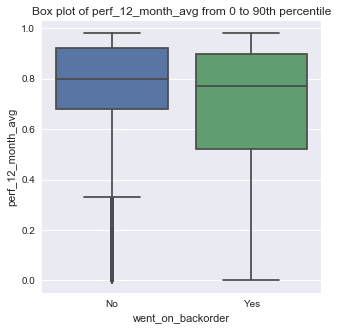

In [61]:
sns.boxplot(x='went_on_backorder',y='perf_12_month_avg', data=df[(df.perf_12_month_avg < df.perf_12_month_avg.quantile(0.9))  & (df.perf_12_month_avg > df.perf_12_month_avg.quantile(0))]).set_title('Box plot of perf_12_month_avg from 0 to 90th percentile')

Observations from the boxplot of performance in 6 and 12 months features and "went_on_backorder":


*   The assumption we assumed that -99 represents a mising value for performance column seems to be true as there are n't any sgnificant negative values in the plot
*   When replotted boxplot for values between 0th and 90th quantiles it can be noted that items which underperformed in the past 6 and 12 months went to back order.




#### 2.3.15 Boxplot between "local_bo_qty" and "went_on_backorder"
local_bo_qty represents amount of stock overdue.

In [62]:
df[['local_bo_qty']].describe()

,local_bo_qty
count,1.687860e+06
mean,6.264507e-01
std,3.372224e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.253000e+04


In [63]:
df.local_bo_qty.quantile(0.98)

0.0

In [64]:
df.local_bo_qty.quantile(0.99)

1.0

Text(0.5,1,'Box plot of local_bo_qty')

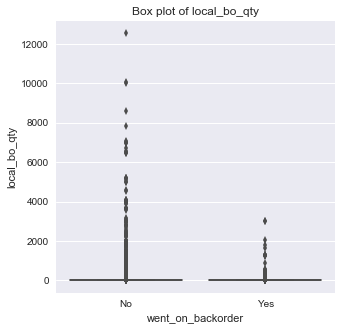

In [65]:
sns.boxplot(x='went_on_backorder',y='local_bo_qty', data=df).set_title('Box plot of local_bo_qty')

Observations from the boxplot of "local_bo_qty" and "went_on_backorder":


*   Similar to other features this feature also has right skewedness  , but unlike other features the minority class ( went on back order = "Yes") also has a few values after IQR
*   Around 1% of datapoints only have non-zero value for this feature.


#### Insights from Numerical Feature of the Dataset:

*   For Bi variate analysis the features local_bo_qty and pieces_past_due can be ignored as 98% values are zero
*   For the remaining features if we consider the datapoints between 0(0.001) th quantile and 90th quantiles values most of the **outliers** are removed and can make some inferences.
*   As plots of **sales, forecast and performance features** are same (very similar ) to the other columns in same features for bi variate analysis we can select one from each of the groups.
*   **Right  skewed columns** = ['national_inv' , 'in_transit_qty' , 'forecast_3_month','forecast_6_month','forecast_9_month' , 'sales_1_month','sales_3_month','sales_6_month','sales_9_month' , 'min_bank','pieces_past_due','local_bo_qty']

#### 2.4 Pair Plots between Selected Features for Entire Data and Data between 5th and 90th Quantiles


In [66]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [67]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df1= df.copy()
cat = df1.select_dtypes(include = ['object']).columns
num = df1.select_dtypes(exclude = ['object']).columns
for col in num:
  if (((df1[col].dtype)=='float64')):
    percentiles = df1[col].quantile([0.05,0.9]).values
    df1[col][df1[col] < percentiles[0]] = percentiles[0]
    df1[col][df1[col] > percentiles[1]] = percentiles[1]          
   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


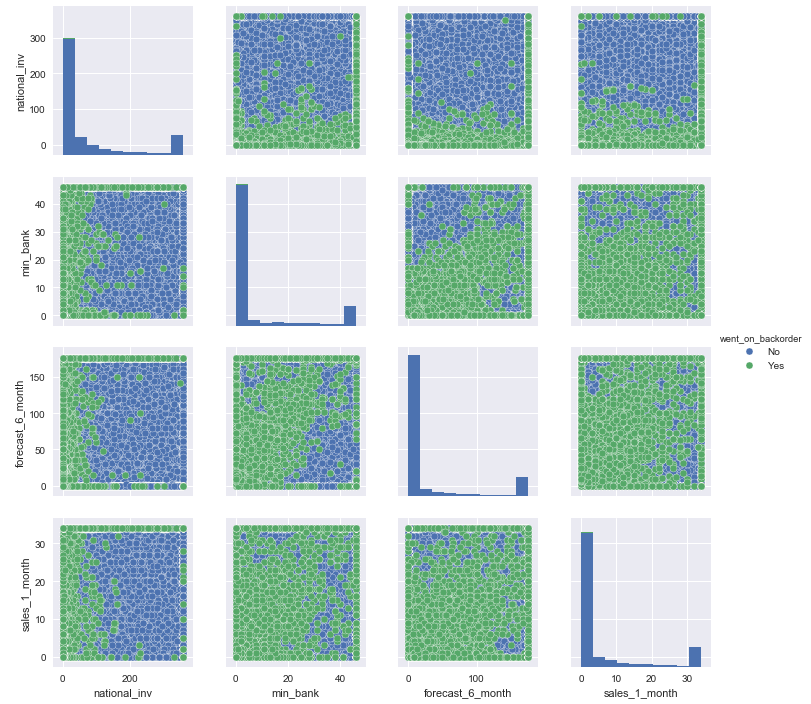

In [69]:
sns.pairplot(df1[['national_inv','min_bank','forecast_6_month','sales_1_month','went_on_backorder']],hue = 'went_on_backorder')

#### Insights from Pairplot of Numerical Features of Dataset

*   For lower national_inv as min_bank increase there are higher chances of items going to backorder.
*   For higher nationa_inv>100 there are very less chances of items going into backorder.


### 3. Categorical Feature Statistics and Observations

In [70]:
categorical_features

['sku',
 'potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [71]:
df[categorical_features].head()

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,No,No,No,No,Yes,No,No
1,1043384,No,No,No,No,Yes,No,No
2,1043696,No,Yes,No,No,Yes,No,No
3,1043852,No,No,No,No,Yes,No,No
4,1044048,No,Yes,No,No,Yes,No,No


In this section, we will use visualization tools between the target (dependent variable) i.e. "went_on_backorder" and all 7 categorical features in the dataset. we will try to find the insights from these categorical features though statistical analysis.
         
 * Categorical Features: 8 columns
            1. sku(Stock Keeping unit) : The product id — Unique for each row so can be ignored
            2. Potential_issue : Any problem identified in the product/part.Different Flags (Yes/No/nan) set for the product
            3. Deck_risk: Different Flags (Yes or No or nan) set for the product
            4. oe_constraint: Different Flags (Yes or No or nan) set for the product
            5. ppap_risk: Different Flags (Yes or No or nan) set for the product
            6. stop_auto_buy: Different Flags (Yes or No or nan) set for the product
            7. rev_stop : Different Flags (Yes or No or nan) set for the product
 * Label/Target Variable: went_on_backorder
            The target variable to predict consists of two values.
            “Yes” - If the Product predicted to go to Backorder
            “No” - If the Product predicted to be not going to Backorder
            "nan" - missing values  

In [72]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is sku and number of categories are 1687861
The feature is potential_issue and number of categories are 3
The feature is deck_risk and number of categories are 3
The feature is oe_constraint and number of categories are 3
The feature is ppap_risk and number of categories are 3
The feature is stop_auto_buy and number of categories are 3
The feature is rev_stop and number of categories are 3
The feature is went_on_backorder and number of categories are 3


#### 3.1 Barplot between "potential_issue" and "went_on_backorder"
potential_issue represents any problem identified in the product/part. Different Flags (Yes/No/nan) set for the product

went_on_backorder        No       Yes
potential_issue                      
No                 0.993336  0.006664
Yes                0.943771  0.056229


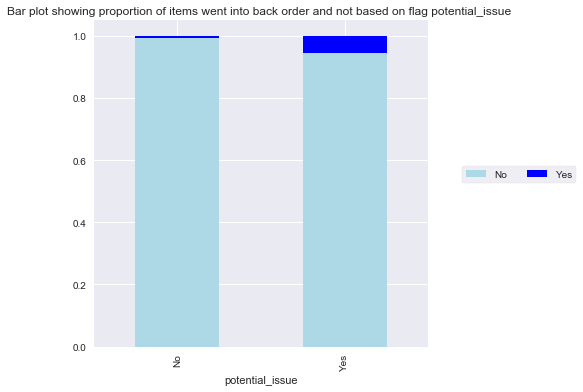

In [102]:
counts_df = df.groupby(["potential_issue", "went_on_backorder"])["sku"].count().unstack()
proportions_df = counts_df.T.div(counts_df.T.sum()).T
print(proportions_df)


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))
proportions_df.plot(kind="bar", stacked=True, color=["lightblue", "blue"], ax=ax, title="Bar plot showing proportion of items went into back order and not based on flag potential_issue ")


# Add a legend and informative axis label
ax.legend(ncol=2, loc=(1.1,0.5), frameon=True)
sns.despine(left=True, bottom=True)




*   If potential_issue flag is 'Yes' then there is 9 times more chance of item going to back order when compared to if flag set to 'No'




#### 3.2 Boxplot between "deck_risk" and "went_on_backorder"
deck_risk: Different Flags (Yes or No or nan) set for the product

went_on_backorder        No       Yes
deck_risk                            
No                 0.992789  0.007211
Yes                0.995055  0.004945


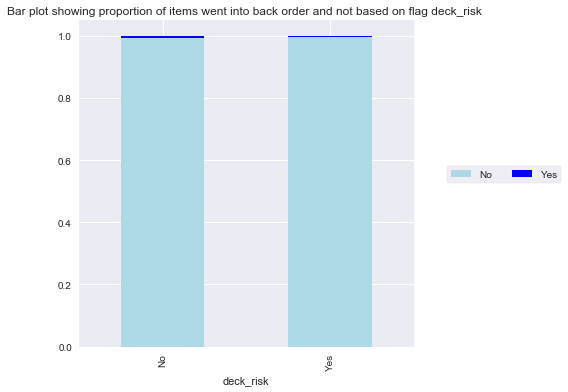

In [94]:
counts_df = df.groupby(["deck_risk", "went_on_backorder"])["sku"].count().unstack()
proportions_df = counts_df.T.div(counts_df.T.sum()).T
print(proportions_df)

f, ax = plt.subplots(figsize=(6, 6))
proportions_df.plot(kind="bar", stacked=True, ax=ax,color=["lightblue", "blue"], title="Bar plot showing proportion of items went into back order and not based on flag deck_risk ")
# Add a legend and informative axis label
ax.legend(ncol=2, loc=(1.1,0.5), frameon=True)
sns.despine(left=True, bottom=True)




*   The flag dec_risk is not very useful as proportion of postive classes are almost equally disitributed between both flag values of deck_risk



#### 3.3 Boxplot between "oe_constraint" and "went_on_backorder"
oe_constraint: Different Flags (Yes or No or nan) set for the product

went_on_backorder        No       Yes
oe_constraint                        
No                 0.993313  0.006687
Yes                0.967347  0.032653


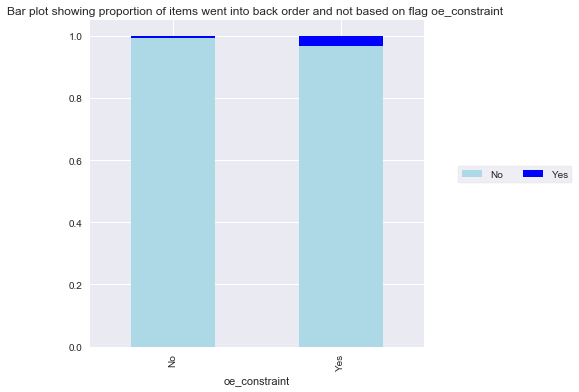

In [96]:
counts_df = df.groupby(["oe_constraint", "went_on_backorder"])["sku"].count().unstack()
proportions_df = counts_df.T.div(counts_df.T.sum()).T
print(proportions_df)

f, ax = plt.subplots(figsize=(6, 6))
proportions_df.plot(kind="bar", stacked=True, ax=ax,color=["lightblue", "blue"],title="Bar plot showing proportion of items went into back order and not based on flag oe_constraint ")
# Add a legend and informative axis label
ax.legend(ncol=2, loc=(1.1,0.5), frameon=True)
sns.despine(left=True, bottom=True)



*   If oe_cosntraint flag is set to Yes then there is 5 times higher chance of item going to backorder when compared to flag set to No



#### 3.4 Boxplot between "ppap_risk" and "went_on_backorder"
ppap_risk: Different Flags (Yes or No or nan) set for the product

went_on_backorder        No       Yes
ppap_risk                            
No                 0.993576  0.006424
Yes                0.991370  0.008630


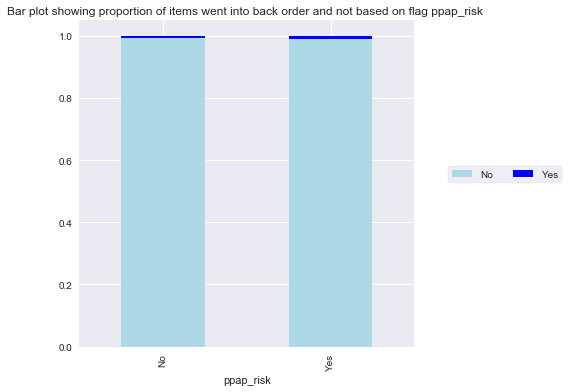

In [97]:
counts_df = df.groupby(["ppap_risk", "went_on_backorder"])["sku"].count().unstack()
proportions_df = counts_df.T.div(counts_df.T.sum()).T
print(proportions_df)

f, ax = plt.subplots(figsize=(6, 6))
proportions_df.plot(kind="bar", stacked=True, ax=ax,color=["lightblue", "blue"],title="Bar plot showing proportion of items went into back order and not based on flag ppap_risk ")
# Add a legend and informative axis label
ax.legend(ncol=2, loc=(1.1,0.5), frameon=True)
sns.despine(left=True, bottom=True)

*   The flag dec_risk is not very useful as proportion of postive classes are almost equally disitributed between both flag values of deck_risk

#### 3.6 Boxplot between "stop_auto_buy" and "went_on_backorder"
stop_auto_buy: Different Flags (Yes or No or nan) set for the product

went_on_backorder        No       Yes
stop_auto_buy                        
No                 0.992290  0.007710
Yes                0.993348  0.006652


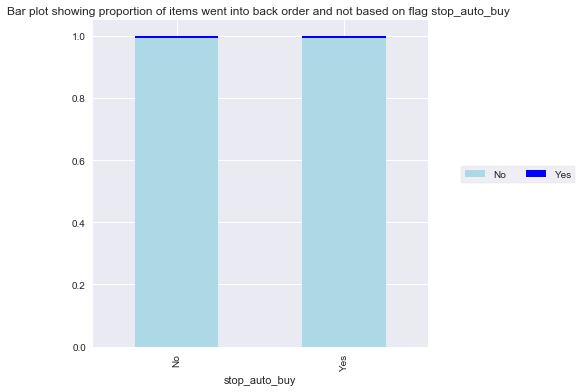

In [98]:
counts_df = df.groupby(["stop_auto_buy", "went_on_backorder"])["sku"].count().unstack()
proportions_df = counts_df.T.div(counts_df.T.sum()).T
print(proportions_df)

f, ax = plt.subplots(figsize=(6, 6))
proportions_df.plot(kind="bar", stacked=True, ax=ax,color=["lightblue", "blue"],title="Bar plot showing proportion of items went into back order and not based on flag stop_auto_buy ")
# Add a legend and informative axis label
ax.legend(ncol=2, loc=(1.1,0.5), frameon=True)
sns.despine(left=True, bottom=True)

*   The flag stop_auto_buy is not very useful as proportion of postive classes are almost equally disitributed between both flag values of deck_risk

#### 3.7 Boxplot between "rev_stop" and "went_on_backorder"
rev_stop : Different Flags (Yes or No or nan) set for the product

went_on_backorder        No       Yes
rev_stop                             
No                 0.993306  0.006694
Yes                1.000000       NaN


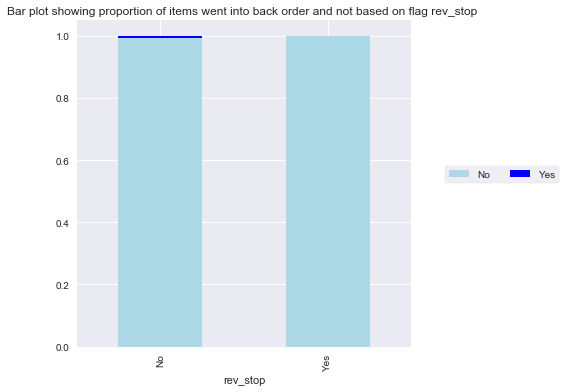

In [99]:
counts_df = df.groupby(["rev_stop", "went_on_backorder"])["sku"].count().unstack()
proportions_df = counts_df.T.div(counts_df.T.sum()).T
print(proportions_df)

f, ax = plt.subplots(figsize=(6, 6))
proportions_df.plot(kind="bar", stacked=True, ax=ax,color=["lightblue", "blue"],title="Bar plot showing proportion of items went into back order and not based on flag rev_stop ")
# Add a legend and informative axis label
ax.legend(ncol=2, loc=(1.1,0.5), frameon=True)
sns.despine(left=True, bottom=True)



*   No item went to backorder if rev_stop flag is set to Yes
*   For rev_stop = 'No' the proportion of orders that did go to back order and that weren't is same as class ratio that is 99.33 % : 0.667%



## 4. Observations from Exploratory Data Analysis and Visualization:

* Challenges observed in EDA which should be taken care in Feature Engineering Part:
  * Dataset is highly imbalanced should be handled in the feature engineerig section. The problem we are solving is binary classification with very high data imbalance       with positive class being the minority.
  * Data consists of both Categorical features and numerical features. The categorical features consists of different flags with Yes or     No values. 
  * Missing Values: Missing values are present in Lead time column and -99.0 an unusual value in performance columns in which the remaining values are b/w 0 and 1. Replace -99.0 in performance columns with Nan for imputation in feature engineering section.
  * Outliers: Most of the feature are having outliers. If we consider the datapoints between 0(0.001) th quantile and 90th quantiles values most of the outliers are removed and can make some inferences.
  * Duplicate: no duplicate datapoints. As part of preprocesing and feature engineering data , dropped the first columns (Sku) which contains product ids unique for each row and also dropped the last row whch contains nan values.
  * Distribution: Almost all the numerical columns had extreme skewedness (on positive side) indicating them as outliers or also can be     useful data as sale , inventory , forecast of some products might be very high which is also proved to be true when we plotted qq       plot of normal distribution vs log(columns), Applied the log transform to the data obtained in step 10 followed by standardization to prepare another dataset .
  * **Right  skewed columns** = ['national_inv' , 'in_transit_qty' , 'forecast_3_month','forecast_6_month','forecast_9_month' ,             'sales_1_month','sales_3_month','sales_6_month','sales_9_month' , 'min_bank','pieces_past_due','local_bo_qty']
  * **Left skewed colums** = ['perf_6_month_avg', 'perf_12_month_avg'}